# <center>Time Evolution</center>

In quantum mechanics time evolution follows a deterministic rule for the wave function. The amplitudes for eigenstates are time dependent, but outcomes of measurements are inherently probabilistic. Time dependence is described by Time Dependent Schrodinger Equation:

### <center>$i\hbar \frac{d|\psi(t)\rangle}{dt} = \hat{H}|\psi(t)\rangle$</center>

Solving it leads to introduction of the time evolution operator:

### <center>$\hat{U}(t) = e^{\frac{-i\hat{H}t}{\hbar}}$</center>

Hence we get the time evolution for the wave function:

### <center>$|\psi(t)\rangle = \hat{U}(t)|\psi(t_0)\rangle = e^{\frac{-i\hat{H}t}{\hbar}}|\psi(t_0)\rangle$</center>

We can extend it by taking hamiltonian eigenstates $\sum_n|n\rangle\langle n| = 1$ and eigenvalues $\epsilon_n$ into account:

### <center>$|\psi(t)\rangle = e^{\frac{-i\hat{H}t}{\hbar}}|\psi(t_0)\rangle = \sum_ne^{\frac{-i\epsilon_nt}{\hbar}}|n\rangle\langle n|\psi(0)\rangle = \sum_nc_n(t)|n\rangle$</center>

Where $c_n(t)$ is a probability amplitude of an eigenstate $|n\rangle$ changing in time.

### <center>$c_n(t) = e^{\frac{-i\epsilon_nt}{\hbar}\langle n|\psi(0)\rangle}$</center>

And last but not least we need an observable $\langle \hat{A}\rangle$ to make quantitative predictions. In our case we will use introduced before spin-projection operator $\langle \hat{S}_i^z\rangle$:

### <center>$\langle \hat{S}_i^z\rangle(t) = \langle\psi(t)|\hat{S}_i^z|\psi(t)\rangle$</center>

And for each spin $i$ we are going to create its own spin operator.

Let's implement it in a code:

In [1]:
import sys
sys.path.append('..')

In [2]:
from OperatorFunctions import create_initial_state, s_z_total
from HamiltonianClass import QuantumState
from IPython.display import display, Latex

# variable used to improve notation
rangle = r'\rangle'
hat_S = r'\hat{S}'

To begin we need a way to input an arbitrary initial state. By default it makes half of the system in the state $|\uparrow\rangle$ and other half $|\downarrow\rangle$. It uses function <i>create_initial_state</i> to achieve it:

In [3]:
L = 16
initial_state = create_initial_state(L)
display(Latex(f'The initial state is $|{initial_state}' + r'\rangle$'))

<IPython.core.display.Latex object>

Where $|1\rangle$ and $|0\rangle$ are equivalent to $|\uparrow\rangle$ and $|\downarrow\rangle$ respectfully.

We also need a way to convert state given as <i>string</i> to a state vector. To do this we need a function <i>set_basis_element_to_state_vector</i>, which is built in <i>QuantumState</i> object. 

In [4]:
L = 4
J = 1
delta = 1
quantum_state = QuantumState(L, J, delta, is_reduced=True)

<i>QuantumState</i> instance by default sets state vector to lowest eigenstate:

In [5]:
quantum_state.print_state_vector()

- 0.1494|0011> + 0.5577|0101> - 0.4082|0110> - 0.4082|1001> + 0.5577|1010> - 0.1494|1100>


Now we change it. Keep in mind that its length has to be the same as $L$ and in case of reduced hamiltonian we can't set vectors which total spin is non-zero ($S^z_{tot} \neq 0$). Otherwise function will print an error message and won't make any changes.

In [6]:
quantum_state.set_basis_element_to_state_vector('1100')
initial_state = quantum_state.get_state_vector()
quantum_state.print_state_vector()

1.0|1100>


In [7]:
quantum_state.set_basis_element_to_state_vector('111000')

[ERROR] Given state is not in current basis


In [8]:
quantum_state.set_basis_element_to_state_vector('1111')

[ERROR] Given state is not in current basis


We can calculate $c_n(t)$ for an arbitrary eigenstate:

In [9]:
eigenstate_number = 3
time_value = 1
c_n = quantum_state.coefficient_c_of_t(time_value, eigenstate_number)
display(Latex(f'$c_n(t)$ equals {c_n} for time {time_value} and eigenstate $|{eigenstate_number}{rangle}$'))

<IPython.core.display.Latex object>

We can store coefficient $c_n(t)$ for every eigenstate as a vector:

In [10]:
c_n_range = quantum_state.coefficient_c_of_t_for_all_eigenvalues(time_value)
c_n_range.print()

    (+6.756e-03,+1.493e-01)
    (+1.558e-01,-2.212e-01)
                      (0,0)
    (-5.539e-01,-6.456e-02)
    (-5.862e-01,-2.883e-01)
    (-2.987e-01,-2.783e-01)


We can see that 4th row prints the same value as cell before.

Now we have to multiply each eigenvalue $n$ by its index-wise eigenstate $|n\rangle$ and then add all vectors together. It is done by code below:

In [11]:
time_evolution = quantum_state.quantum_state_of_t(time_value)
display(Latex(f'$|\psi(t={time_value}){rangle}$:'))
time_evolution.print()

<IPython.core.display.Latex object>

    (+4.723e-03,-1.194e-03)
    (-1.388e-02,-3.533e-02)
    (-1.070e-01,+2.631e-02)
    (-1.070e-01,+2.631e-02)
    (+9.977e-02,+4.097e-01)
    (+8.550e-01,+2.558e-01)


Note that first column is a real value of amplitudes and second column is its imaginary part. Whole state has changed significantly since its initial state:

In [12]:
display(Latex(r'$|\psi(t=0)\rangle$:'))
initial_state.print()

<IPython.core.display.Latex object>

        0
        0
        0
        0
        0
   1.0000


Note that if we set one of eigenstates as initial vector, it won't change in time (analytically). That's why we call them stationary states.

In [13]:
quantum_state.set_vector_from_eigenstate(2)

display(Latex(r'$|\psi(t=0)\rangle$:'))
quantum_state.get_state_vector().print()

display(Latex(f'$|\psi(t={time_value}{rangle}$:'))
quantum_state.quantum_state_of_t(time_value).print()

<IPython.core.display.Latex object>

        0
        0
  -0.7071
   0.7071
        0
        0


<IPython.core.display.Latex object>

    (+4.325e-17,-1.902e-17)
    (-7.726e-17,-1.111e-16)
    (-6.851e-01,+1.749e-01)
    (+6.851e-01,-1.749e-01)
    (-7.726e-17,-1.111e-16)
    (+4.325e-17,-1.902e-17)


But because of small imprecisions in floating points and binary computation it changes slightly. Various configuration can be checked below:

In [14]:
from CommonFunctions import generate_binary_strings
import ipywidgets
from matplotlib import pyplot as plt

In [15]:
def plot_state_vector(initial_vector='0000', time=0):
    state = QuantumState(4, 1, 1)
    state.set_basis_element_to_state_vector(initial_vector)
    state_vector = state.get_state_vector()
    time_evolution_vector = state.quantum_state_of_t(time)
    
    figure, axes = plt.subplots(1, 2, layout='constrained')
    state.plot_data(matrix=state_vector, axes=axes[0])
    axes[0].set_title(f'$|\psi(t=0){rangle} = |{initial_vector}{rangle}$')
    state.plot_data(matrix=time_evolution_vector, axes=axes[1])
    axes[1].set_title(f'$|\psi(t={time}){rangle}$')

    plt.show()

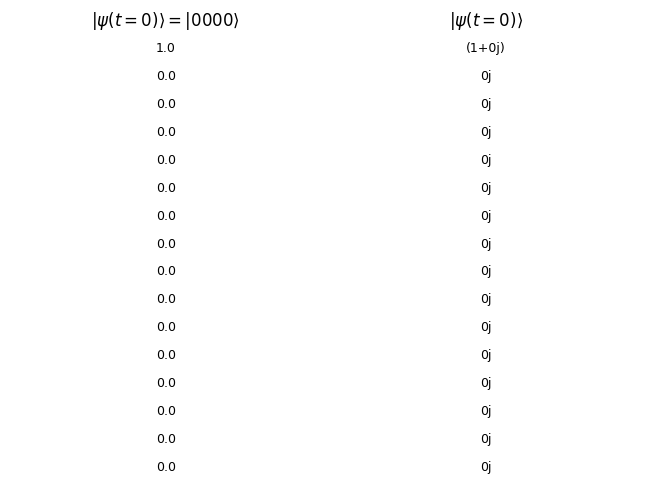

In [16]:
plot_state_vector()

In [17]:
ipywidgets.interact(plot_state_vector, 
                    initial_vector=generate_binary_strings(4),
                    time=(0, 10, 0.1))

interactive(children=(Dropdown(description='initial_vector', options=('0000', '0001', '0010', '0011', '0100', …

<function __main__.plot_state_vector(initial_vector='0000', time=0)>

Now we can introduce spin operator $\hat{S}_i^z$. It works the same way as it was shown in <i>ModelDescryption.ipynb</i>, but now we have to scale its size from matrix $2\times2$ to the same size as hamiltonian.

In [18]:
spin_operator = quantum_state.set_spin_operator(0, assign=False)
spin_operator.print()

  -0.5000        0        0        0        0        0
        0  -0.5000        0        0        0        0
        0        0  -0.5000        0        0        0
        0        0        0   0.5000        0        0
        0        0        0        0   0.5000        0
        0        0        0        0        0   0.5000


We create different operetor for each spin number to get its time evolution. It differs mostly by minus signs in different diagonal elements.

In [19]:
def print_spin_operator(spin_number=0):
    state = QuantumState(3, 1, 1)
    spin_operator = state.set_spin_operator(spin_number, assign=False)
    spin_operator.print()

In [20]:
ipywidgets.interact(print_spin_operator,
                    spin_number=(0, 2, 1))

interactive(children=(IntSlider(value=0, description='spin_number', max=2), Output()), _dom_classes=('widget-i…

<function __main__.print_spin_operator(spin_number=0)>

Now we can calculate expected value $\langle\hat{S}^z_i\rangle$ for spin operators.

In [21]:
def operator_expected_value(spin_number=0, time_value=0):
    state = QuantumState(4, 1, 0, is_reduced=True)
    state.set_basis_element_to_state_vector('1100')
    state.set_spin_operator(spin_number)
    exp_value = state.operator_time_evolution(time_value)
    display(Latex(f'The result of computation: $\langle{hat_S}_{spin_number}^z{rangle} = {exp_value}$'))

In [22]:
ipywidgets.interact(operator_expected_value,
                    spin_number=(0, 3, 1),
                    time_value=(0, 20, 0.1))

interactive(children=(IntSlider(value=0, description='spin_number', max=3), FloatSlider(value=0.0, description…

<function __main__.operator_expected_value(spin_number=0, time_value=0)>

Now let's plot it on a graph and tweak with every parameter:

In [23]:
import numpy as np
time_range = np.linspace(0, 20, 100)

In [24]:
def plot_spin_time_evolution(J=1, delta=0, spin_number=0, initial_state='0011'):
    if J != 0:
        state = QuantumState(4, J, delta, is_reduced=True)
        state.set_basis_element_to_state_vector(initial_state)
        state.set_spin_operator(spin_number)
        time_evolution_function = state.operator_time_evolution_vectorized()
        spin_value_range = time_evolution_function(time_range)
    
        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.plot(time_range, spin_value_range, color='black')
        axes.set(title=f'Spin magnetization in function of time $\langle{hat_S}_{spin_number}^z{rangle}(t)$',
                 ylabel=f'$\langle{hat_S}_i^z{rangle}$',
                 ylim=[-0.6, 0.6],
                 xlabel='time')
        axes.yaxis.label.set(rotation=0)
        axes.grid()
        plt.show()

In [25]:
ipywidgets.interact(plot_spin_time_evolution,
                    J=(-5, 5, 0.2),
                    delta=(0, 3, 0.1),
                    spin_number=(0, 3, 1),
                    initial_state=['0011', '0101', '0110', '1001', '1010', '1100'])

interactive(children=(FloatSlider(value=1.0, description='J', max=5.0, min=-5.0, step=0.2), FloatSlider(value=…

<function __main__.plot_spin_time_evolution(J=1, delta=0, spin_number=0, initial_state='0011')>

Now let's use 2D grid to better visualize the time evolution of the whole system:

In [26]:
# Function to restrict interactive text
def restrict_input(change):
    allowed_chars = '01'
    max_length = 8
    change['new'] = ''.join([char for char in change['new'] if char in allowed_chars])
    change['new'] = change['new'][0:max_length]
    restricted_text.value = change['new']
restricted_text = ipywidgets.Text(value='000111')
restricted_text.observe(restrict_input, names='value')

In [27]:
def plot_spin_time_evolution_grid(J=1, delta=0, initial_state='000111', pbc=False):
    L = len(initial_state)
    if J != 0 and L > 1:
        spin_range = np.arange(1, L + 1, 1)
        reduced = True if s_z_total(initial_state) == 0 else False
        state = QuantumState(L, J, delta, is_reduced=reduced, is_pbc=pbc)
        state.set_basis_element_to_state_vector(initial_state)
        time_evolution_function = state.operator_time_evolution_vectorized()
        time_evolution_grid = None
        for spin_number in range(L):
            state.set_spin_operator(spin_number)
            if spin_number == 0:
                time_evolution_grid = time_evolution_function(time_range)[:, None]
            else:
                time_evolution = time_evolution_function(time_range)[:, None]
                time_evolution_grid = np.concatenate((time_evolution_grid, time_evolution), axis=1)
        
        figure, axes = plt.subplots(1, 1, layout='constrained')
        axes.set_title(f'Time evolution for initial state $|{initial_state}{rangle}$')
        grid = axes.pcolormesh(spin_range, time_range, time_evolution_grid,
                               cmap='RdBu', vmin=-0.5, vmax=0.5)
        figure.colorbar(grid, ax=axes)
        axes.set(xlabel='ith state', ylabel='time')
    
        plt.show()

In [28]:
ipywidgets.interact(plot_spin_time_evolution_grid,
                    initial_state=restricted_text,
                    J=(-5, 5, 0.2),
                    delta=(0, 3, 0.1),
                    pbc=ipywidgets.Checkbox(description='Perdiodic Boundary Conditions'))

interactive(children=(FloatSlider(value=1.0, description='J', max=5.0, min=-5.0, step=0.2), FloatSlider(value=…

<function __main__.plot_spin_time_evolution_grid(J=1, delta=0, initial_state='000111', pbc=False)>